Код для создания таблиц

In [ ]:
#SQL CODE
CREATE DATABASE customer

CREATE TABLE customers (
    customer_id SERIAL PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50),
    gender VARCHAR(30),
    DOB VARCHAR(50),
    job_title VARCHAR(50),
    job_industry_category VARCHAR(50),
    wealth_segment VARCHAR(50),
    deceased_indicator VARCHAR(50),
    owns_car VARCHAR(50),
    address VARCHAR(50),
    postcode VARCHAR(50),
    state VARCHAR(30),
    country VARCHAR(64),
    property_valuation INT
);

CREATE table transaction (
	transaction_id SERIAL primary key,
	product_id int,
	customer_id int,
	transaction_date varchar(50),
	online_order varchar(30),
	order_status varchar(30),
	brand varchar(30),
	product_line varchar(30),
	product_class varchar(30),
	product_size varchar(30),
	list_price float(4),
	standard_cost float(4)
);



Код для загрузки данных

In [ ]:
COPY customers(customer_id, first_name, last_name, gender, DOB, job_title, job_industry_category, 
               wealth_segment, deceased_indicator, owns_car, address, postcode, state, country, property_valuation)
FROM 'D:/customer.csv' 
DELIMITER ';' 
CSV HEADER;

COPY transaction(transaction_id, product_id, customer_id, transaction_date, 
                 online_order, order_status, brand, product_line, 
                 product_class, product_size, list_price, standard_cost)
FROM 'D:/transaction.csv'
DELIMITER ';'
CSV HEADER;


Поскольку возникает ошибка загрузки данных типа float из-за знака , в столбцах list_price и standard_cost, для таблицы transaction. Преобразуем данные

In [ ]:
import pandas as pd

df = pd.read_csv("D:/transaction.csv", delimiter=";")

df["list_price"] = df["list_price"].astype(str).str.replace(",", ".").astype(float)
df["standard_cost"] = df["standard_cost"].astype(str).str.replace(",", ".").astype(float)

df.to_csv("D:/transaction_fix.csv", index=False, sep=";")

Исправленный CSV сохранён!


Задание 1.

In [ ]:
SELECT job_industry_category, COUNT(*) AS customer_count
FROM customer
GROUP BY job_industry_category
ORDER BY customer_count DESC;

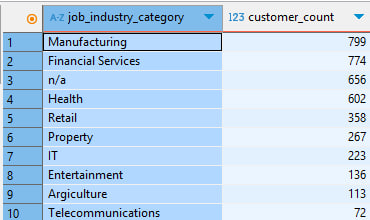

Задание 2.

In [ ]:
SELECT
    TO_CHAR(TO_DATE(transaction_date, 'DD.MM.YYYY'), 'YYYY-MM') AS month,
    brand,
    SUM(list_price - standard_cost) AS total_amount
FROM
    transaction
GROUP BY
    TO_CHAR(TO_DATE(transaction_date, 'DD.MM.YYYY'), 'YYYY-MM'),
    brand
ORDER BY
    month,
    brand;

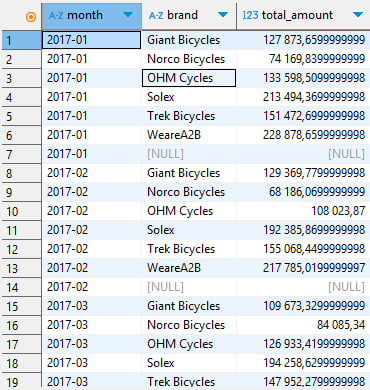

Задание 3.

In [ ]:
SELECT
    t.brand,
    COUNT(*) AS online_order_count
FROM
    transaction t
JOIN
    customer c ON t.customer_id = c.customer_id
WHERE
    t.online_order = 'True'
    AND t.order_status = 'Approved'
    AND c.job_industry_category = 'IT'
GROUP BY
    t.brand
ORDER BY
    t.brand;

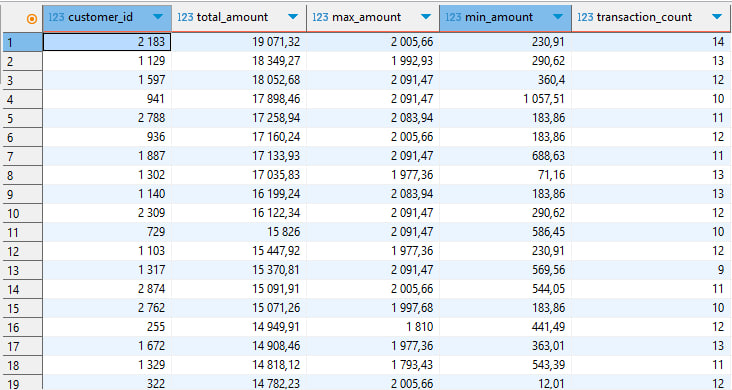

Задание 4.

In [ ]:
SELECT
    customer_id,
    SUM(list_price) AS total_amount,
    MAX(list_price) AS max_amount,
    MIN(list_price) AS min_amount,
    COUNT(*) AS transaction_count
FROM
    transaction
GROUP BY
    customer_id
ORDER BY
    total_amount DESC,
    transaction_count DESC;

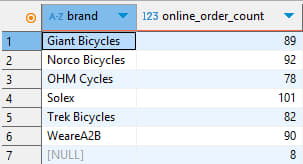

Задание 5.

In [ ]:
WITH customer_totals AS (
    SELECT
        t.customer_id,
        SUM(t.list_price) AS total_amount
    FROM
        transaction t
    WHERE
        t.list_price IS NOT NULL
    GROUP BY
        t.customer_id
)
SELECT
    c.first_name,
    c.last_name,
    ct.total_amount
FROM
    customer_totals ct
JOIN
    customer c ON ct.customer_id = c.customer_id
ORDER BY
    ct.total_amount DESC
LIMIT 1;

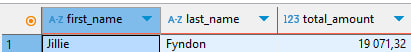

Задание 6.

In [ ]:
SELECT
    customer_id,
    transaction_id,
    product_id,
    transaction_date,
    online_order,
    order_status,
    brand,
    product_line,
    product_class,
    product_size,
    list_price,
    standard_cost
FROM (
    SELECT
        t.*,
        ROW_NUMBER() OVER (PARTITION BY t.customer_id ORDER BY TO_DATE(t.transaction_date, 'DD.MM.YYYY')) AS rn
    FROM
        transaction t
) subquery
WHERE
    rn = 1;

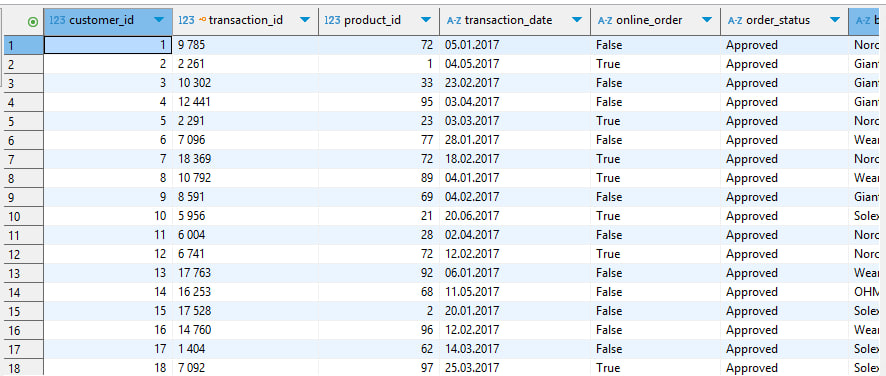

Задание 7.

In [ ]:
SELECT
    customer_id,
    transaction_id,
    product_id,
    transaction_date,
    online_order,
    order_status,
    brand,
    product_line,
    product_class,
    product_size,
    list_price,
    standard_cost
FROM (
    SELECT
        t.*,
        ROW_NUMBER() OVER (PARTITION BY t.customer_id ORDER BY TO_DATE(t.transaction_date, 'DD.MM.YYYY')) AS rn
    FROM
        transaction t
) subquery
WHERE
    rn = 1;

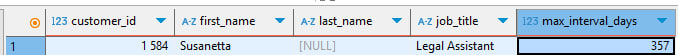